In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # default is ‘last_expr’

%load_ext autoreload
%autoreload 2

In [82]:
import os

import pandas as pd
import geopandas as gpd
from tqdm import tqdm

# Find generalization parameter and eliminate invalid polygons

We try out some values of `tolerance` (in degrees), parameter for generalizing the majority-filtered and polygonized model output, so that the shapes are simpler.

In [3]:
# polygonized model output where majority filter with radius 3 was applied
polygons_path = '.../Data/WCSColombia/delivered/20200715/results_coarse_baseline_201920_polygons_filter3/results_coarse_baseline_201920_filter3.shp'

In [5]:
%%time

polygons = gpd.read_file(polygons_path)

CPU times: user 13.3 s, sys: 569 ms, total: 13.9 s
Wall time: 14 s


In [6]:
len(polygons)

348016

In [11]:
polygons.head(10)

,model_pred,geometry
0,4,"POLYGON ((-73.02764 7.51620, -73.02737 7.51620..."
1,2,"POLYGON ((-73.02737 7.51620, -73.02710 7.51620..."
2,2,"POLYGON ((-72.98991 7.51620, -72.98884 7.51620..."
3,2,"POLYGON ((-72.82013 7.51620, -72.81878 7.51620..."
4,4,"POLYGON ((-72.81097 7.51620, -72.81070 7.51620..."
5,2,"POLYGON ((-72.66032 7.51620, -72.65951 7.51620..."
6,6,"POLYGON ((-72.64819 7.51620, -72.64712 7.51620..."
7,6,"POLYGON ((-72.64388 7.51620, -72.64307 7.51620..."
8,7,"POLYGON ((-72.60157 7.51620, -72.59942 7.51620..."
9,6,"POLYGON ((-72.52126 7.51620, -72.51965 7.51620..."


## Tolerance value

In [78]:
tolerance = 0.0003

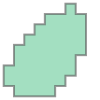

3.340857247685308e-06

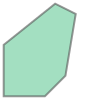

3.2682299162127344e-06

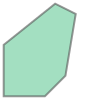

3.2682299162127344e-06

In [79]:
polygon = polygons.iloc[-1000].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

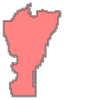

0.00013915396709926383

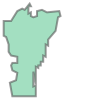

0.00013900871243631625

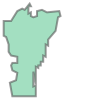

0.00013900871243631625

In [62]:
polygon = polygons.iloc[-100].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

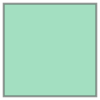

7.262733146874519e-08

0.0

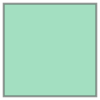

7.262733146874519e-08

In [63]:
polygon = polygons.iloc[0].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

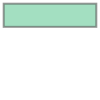

2.905093258816828e-07

0.0

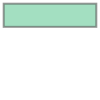

2.905093258816828e-07

In [69]:
polygon = polygons.iloc[100000].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

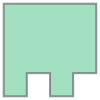

1.0167826406036025e-06

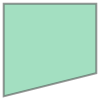

1.0167826406016876e-06

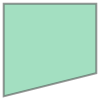

1.0167826406016876e-06

In [66]:
polygon = polygons.iloc[200000].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

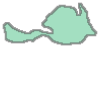

0.0001277514760582805

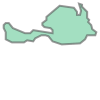

0.00012764253506107308

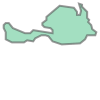

0.00012764253506107308

In [68]:
polygon = polygons.iloc[310000].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

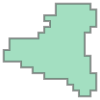

1.038570840041306e-05

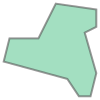

1.0385708400426821e-05

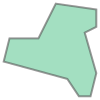

1.0385708400426821e-05

In [73]:
polygon = polygons.iloc[330002].geometry
polygon
polygon.area

poly_simp = polygon.simplify(tolerance, preserve_topology=False)
poly_simp
poly_simp.area

poly_simp = polygon.simplify(tolerance, preserve_topology=True)
poly_simp
poly_simp.area

## Eliminate invalid geometries

In [102]:
invalid_geometries = []

for i, row in tqdm(polygons.iterrows()):
    if not row.geometry.is_valid:
        invalid_geometries.append(row)

348016it [01:01, 5624.45it/s]


In [103]:
len(invalid_geometries)

6018

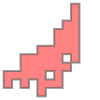

In [106]:
invalid_geometries[1000].geometry

In [112]:
%%time

for i_row, row in tqdm(polygons.iterrows()):
    polygons.at[i_row, 'geometry'] = row.geometry.buffer(0)

348016it [22:34, 256.87it/s] 

CPU times: user 21min 21s, sys: 1min 11s, total: 22min 32s
Wall time: 22min 34s


In [113]:
still_invalid_geometries = []

for i, row in tqdm(polygons.iterrows()):
    if not row.geometry.is_valid:
        still_invalid_geometries.append(row)
len(still_invalid_geometries)

348016it [01:03, 5501.48it/s]


0

In [114]:
polygons.to_file('.../Data/WCSColombia/delivered/20200715/results_coarse_baseline_201920_polygons_filter3/valid/results_coarse_baseline_201920_polygons_filter3_valid.shp')